In [1]:
%load_ext autoreload
%autoreload 2

# %config InlineBackend.figure_formats = ['svg']

from IPython.display import display, Markdown

import sys, os
sys.path.insert(0, '../py_scripts')

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time
import glob
import pickle

# import push_pull as pp
import noise_models as noise
import fig_plot as fplot
import model_fitting as fit

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})

In [2]:
label = '210728'

df = pd.read_csv("push_{}.csv".format(label), index_col=['dataset', 'Unnamed: 1'], dtype={'dataset': str})

display(df)

WT_anti_exp  ST_anti_exp  SpT_anti_exp  Sp_frac_anti_exp  \
dataset                                                                   
375     0      5339.217773   851.042114     41.697887          0.048996   
        1      3682.434082  1073.758545     94.396072          0.087912   
        2      5771.354492   593.224854     12.720540          0.021443   
        3      4066.218262   910.957703    134.919769          0.148108   
        4      2823.588623   575.613098    101.300636          0.175987   
...                    ...          ...           ...               ...   
S+E_250 20496  1468.700684   994.580933    176.785233          0.177748   
        20497  1144.411743  1087.729492    189.722549          0.174421   
        20498  2770.582031  1080.021118    189.190399          0.175173   
        20499  6324.563477  2527.648438    520.051086          0.205745   
        20500  5791.209473   722.282104    157.019409          0.217393   

               WT_anti_rescaled  WT_prob_empty  ST_anti_rescaled  \
dataset                                                            
375     0           5339.217773            0.0        851.042114   
        1           3682.434082            0.0       1073.758545   
        2           5771.354492            0.0        593.224854   
        3           4066.218262            0.0        910.957703   
        4           2823.588623            0.0        575.613098   
...                         ...            ...               ...   
S+E_250 20496       1468.700684            0.0        994.580933   
        20497       1144.411743            0.0       1087.729492   
        20498       2770.582031            0.0       1080.021118   
        20499       6324.563477            0.0       2527.648438   
        20500       5791.209473            0.0        722.282104   

               ST_prob_empty  WT_GFP_infer  WT_conc_infer  ...  \
dataset                                                    ...   
375     0                0.0  11832.453130   11414.408941  ...   
        1                0.0   8018.317627    7600.273438  ...   
        2                0.0   7560.187256    7142.143067  ...   
        3                0.0   7907.320069    7489.275879  ...   
        4                0.0  81396.515630   80978.471441  ...   
...                      ...           ...            ...  ...   
S+E_250 20496            0.0   8434.464356    8016.420167  ...   
        20497            0.0   1955.253540    1537.209351  ...   
        20498            0.0   5596.238769    5178.194580  ...   
        20499            0.0  32464.360350   32046.316161  ...   
        20500            0.0  10203.207030    9785.162841  ...   

               SpT_conc_infer  Sp_frac_GFP_infer  Sp_frac_conc_infer  \
dataset                                                                
375     0            0.000000           0.025776            0.000000   
        1            0.000000           0.014525            0.000000   
        2            0.000000           0.033443            0.000000   
        3         1071.156922           0.160927            0.121229   
        4            0.000000           0.036123            0.000000   
...                       ...                ...                 ...   
S+E_250 20496     1081.261475           0.153132            0.115360   
        20497     2658.537232           0.206895            0.183954   
        20498     2009.377930           0.253354            0.219290   
        20499     6935.249268           0.421106            0.406907   
        20500     2609.271607           0.610517            0.574658   

               total_prob_empty  SpT_conc_predict  SpT_GFP_predict  \
dataset                                                              
375     0                   0.0        188.415670       606.459859   
        1                   0.0        116.336469       534.380658   
        2                   0.0         57.405487       475.449676   
        

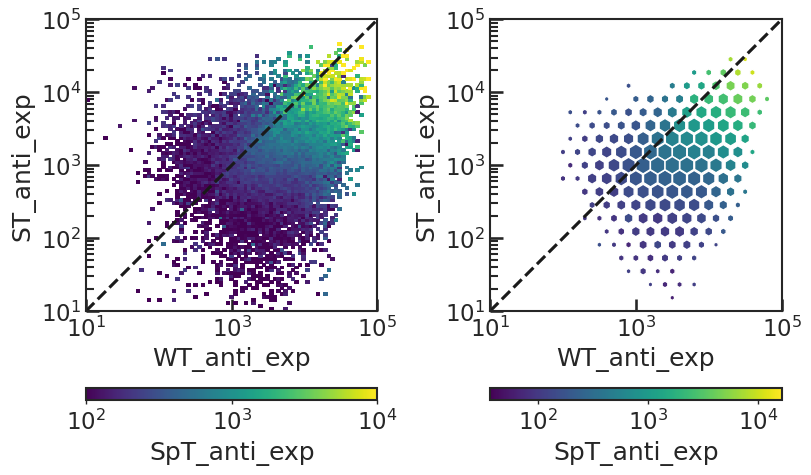

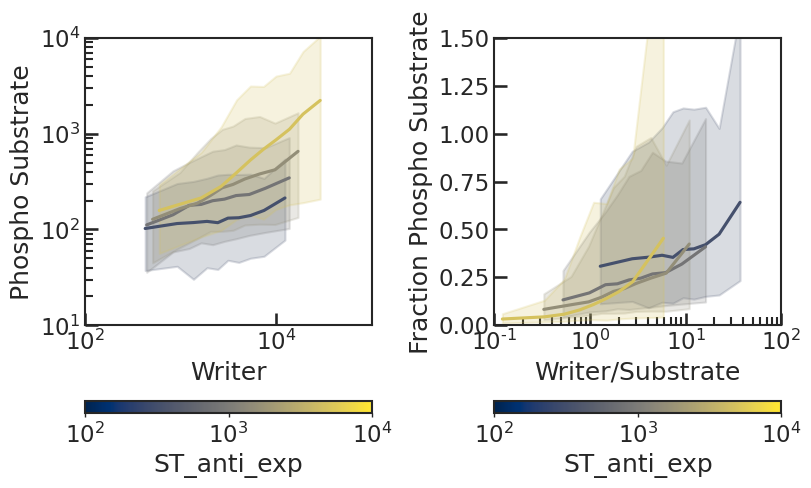

In [17]:
df_tmp = df.query("dataset=='S+E_250'").copy()

fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(8, 5))

fplot.plot_2d_avg(df_tmp, fig, ax1, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', logscale=True, vmin=1e2, vmax=1e4)

fplot.plot_2d_avg_hex(df_tmp, fig, ax2, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', nbins=20, xlim=(1e1, 1e5), ylim=(1e1, 1e5))

plt.show()



fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(8, 5))

fplot.plot_activation_curves(df_tmp, fig, ax1, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', 
                             normalizex=False, normalizey=False, nSTbins=4, ylim=(1e1, 1e4), 
                             error_bands=True, use_median=True, error_band_range=(0.5, 0.95))




fplot.plot_activation_curves(df_tmp, fig, ax2, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', 
                             normalizex=True, normalizey=True, xlim=(1e-1, 1e2), ylim=(0, 1.5), nSTbins=4,
                            error_bands=True, use_median=True, error_band_range=(0.5, 0.95))
    
plt.show()




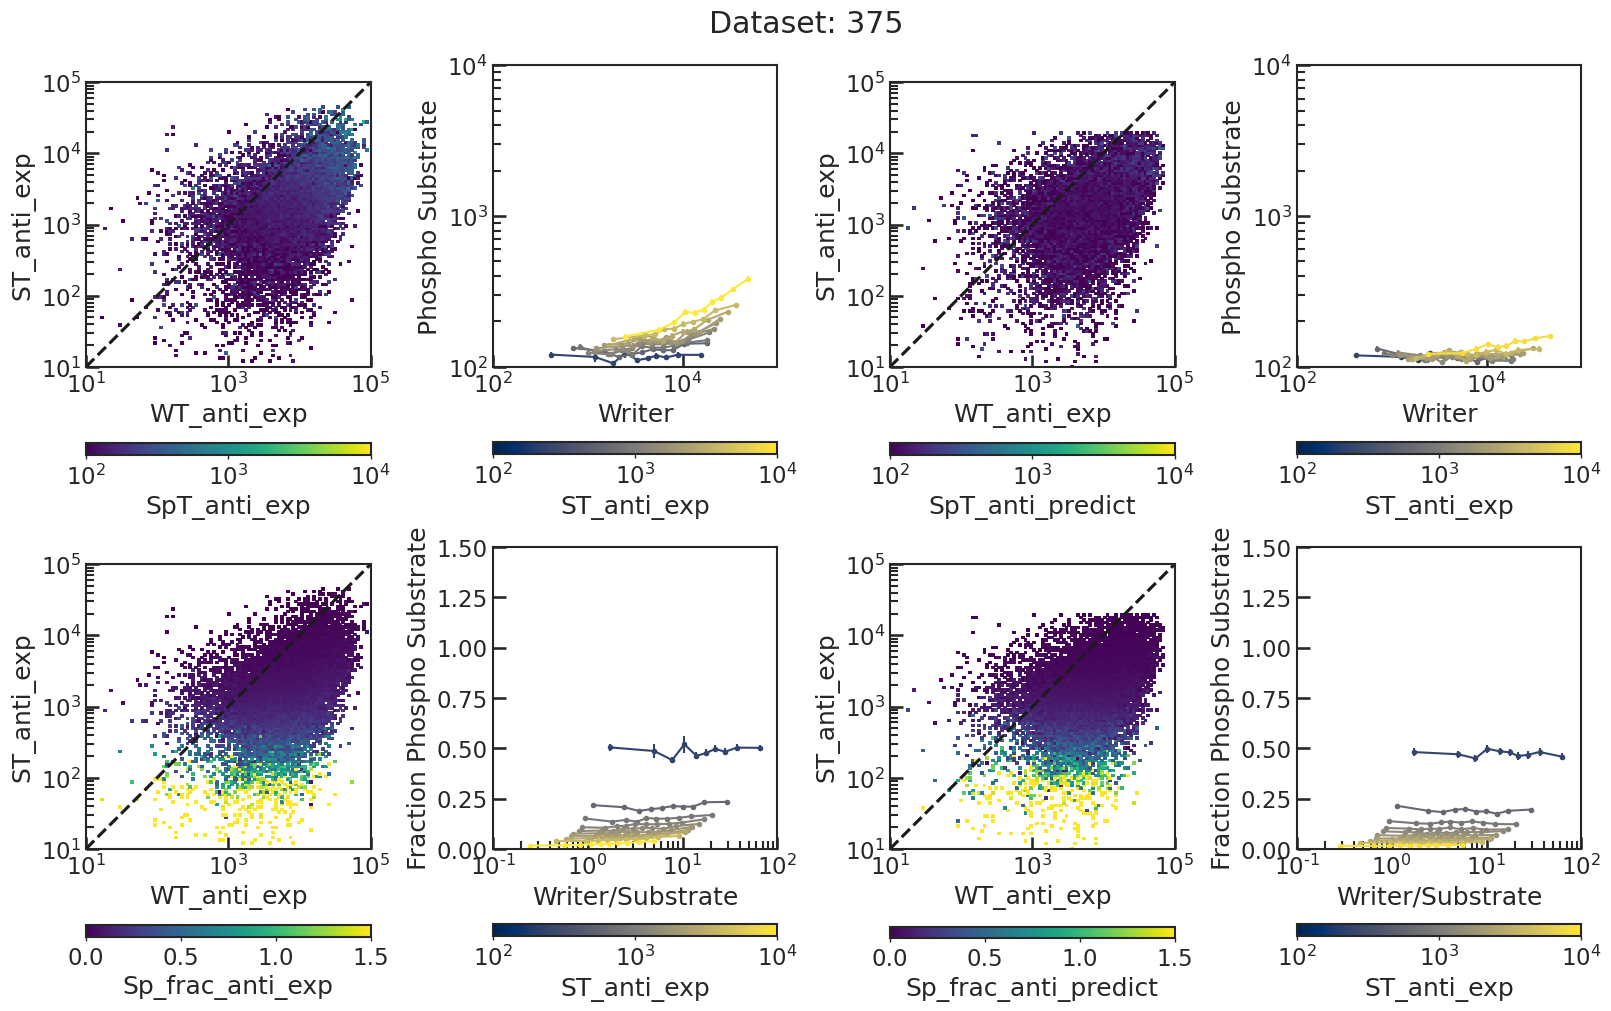

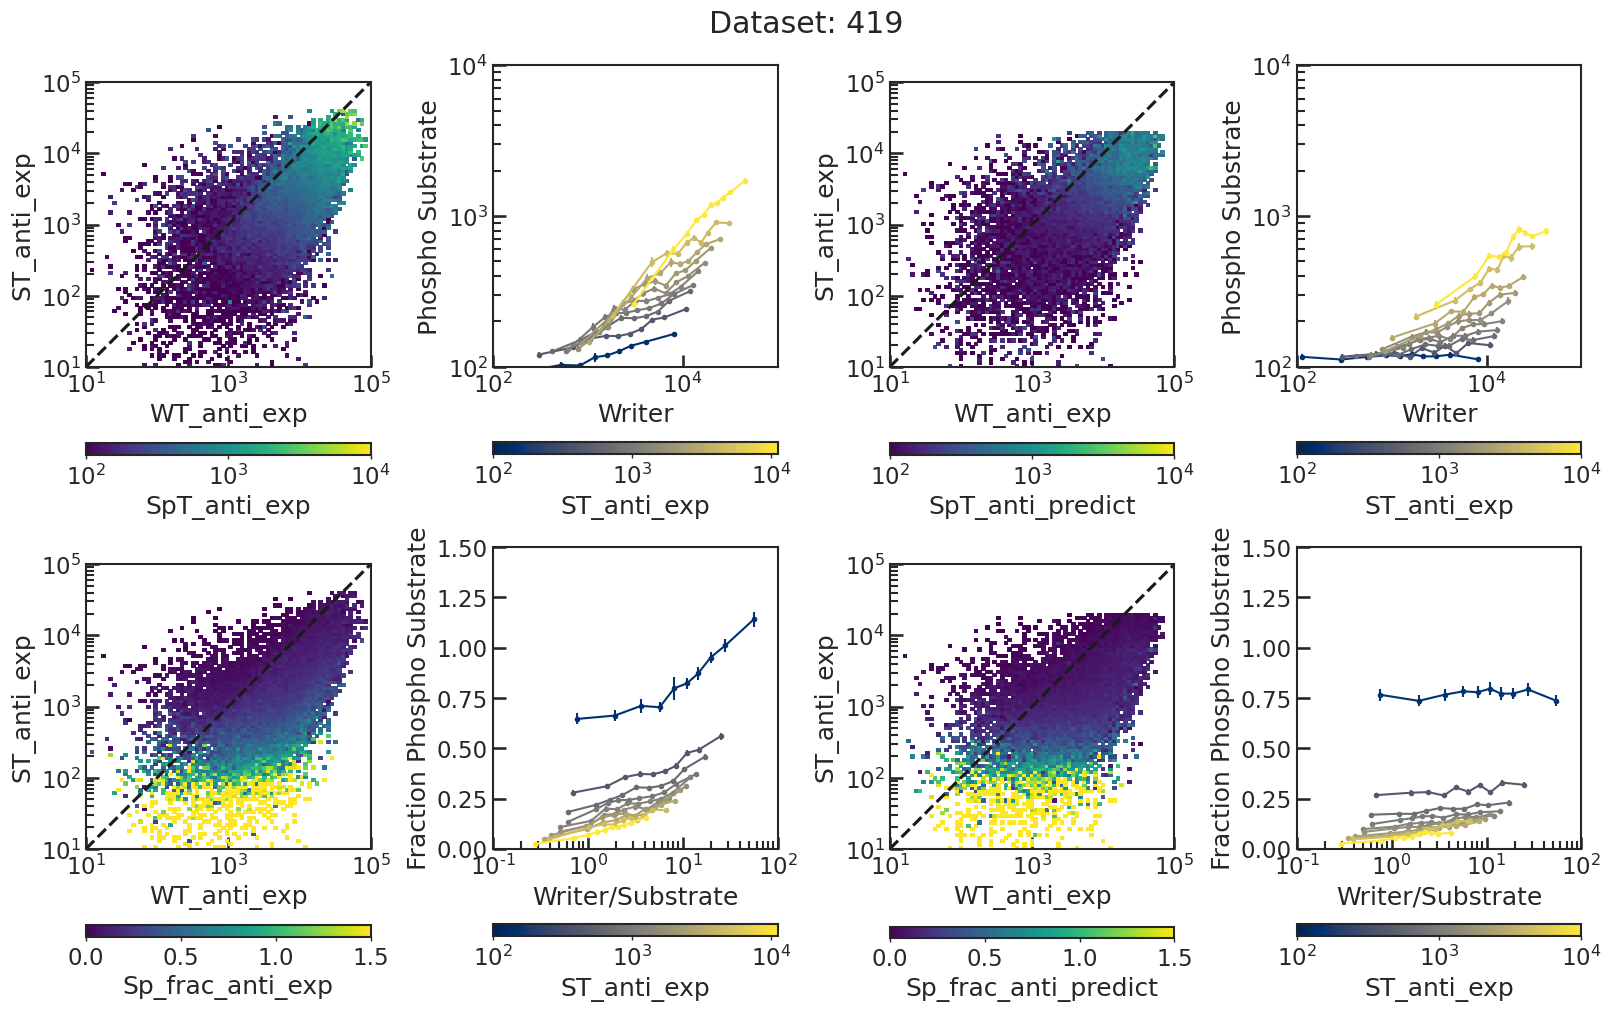

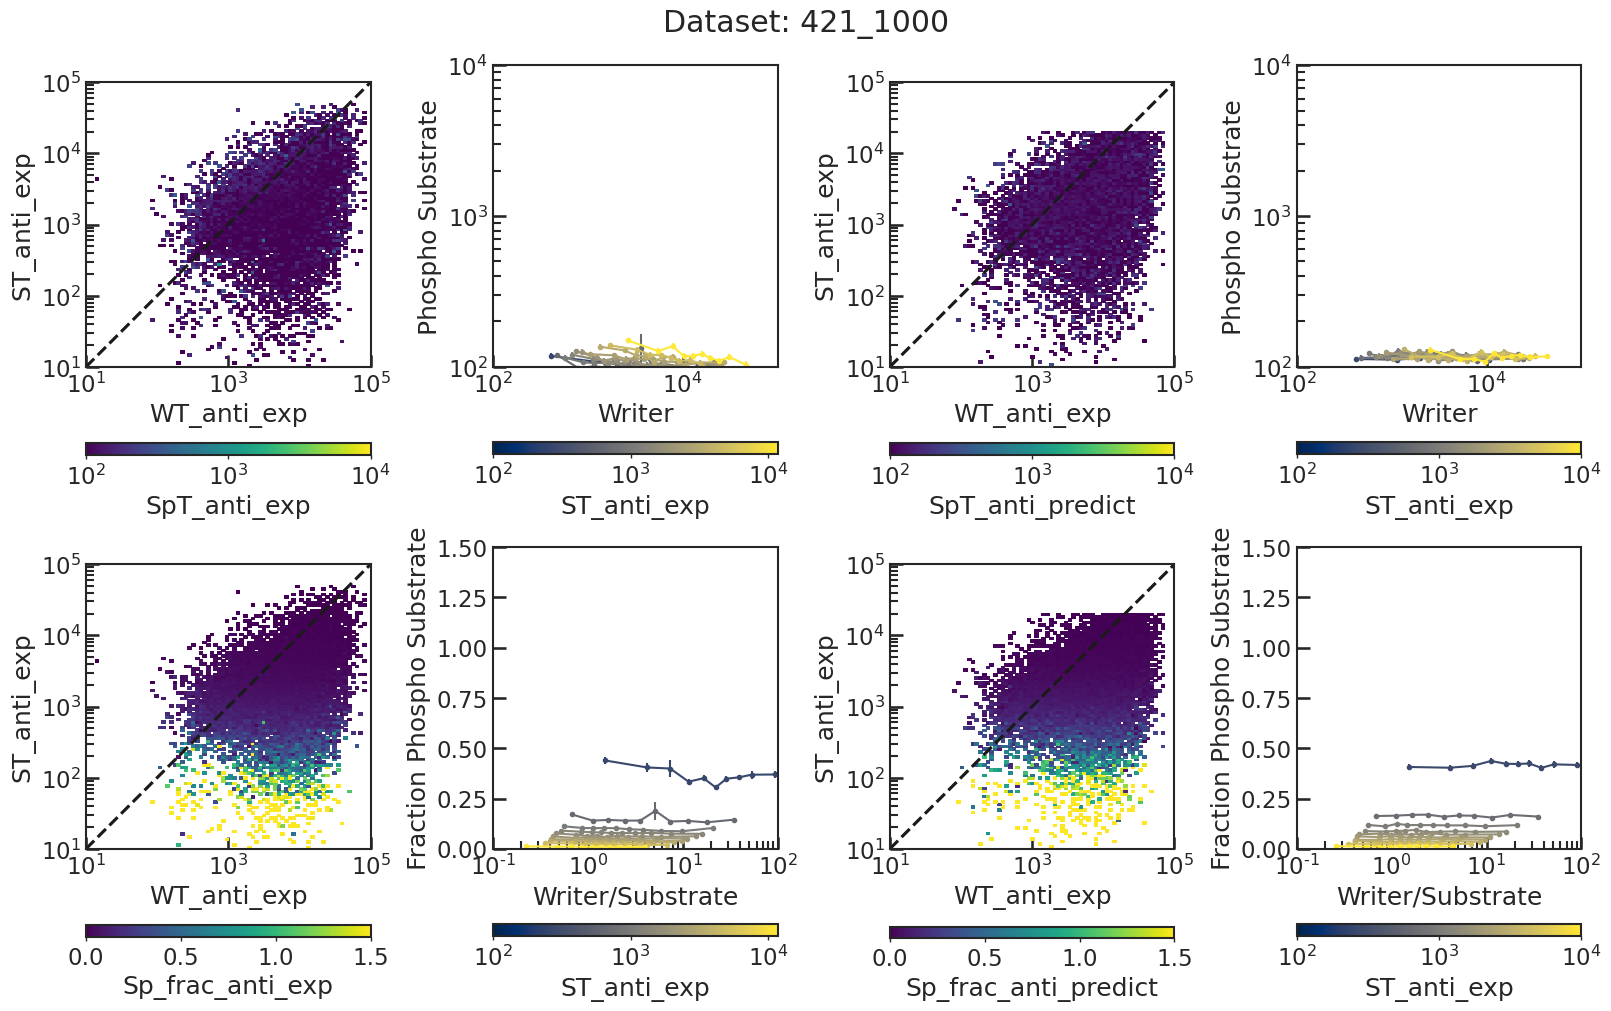

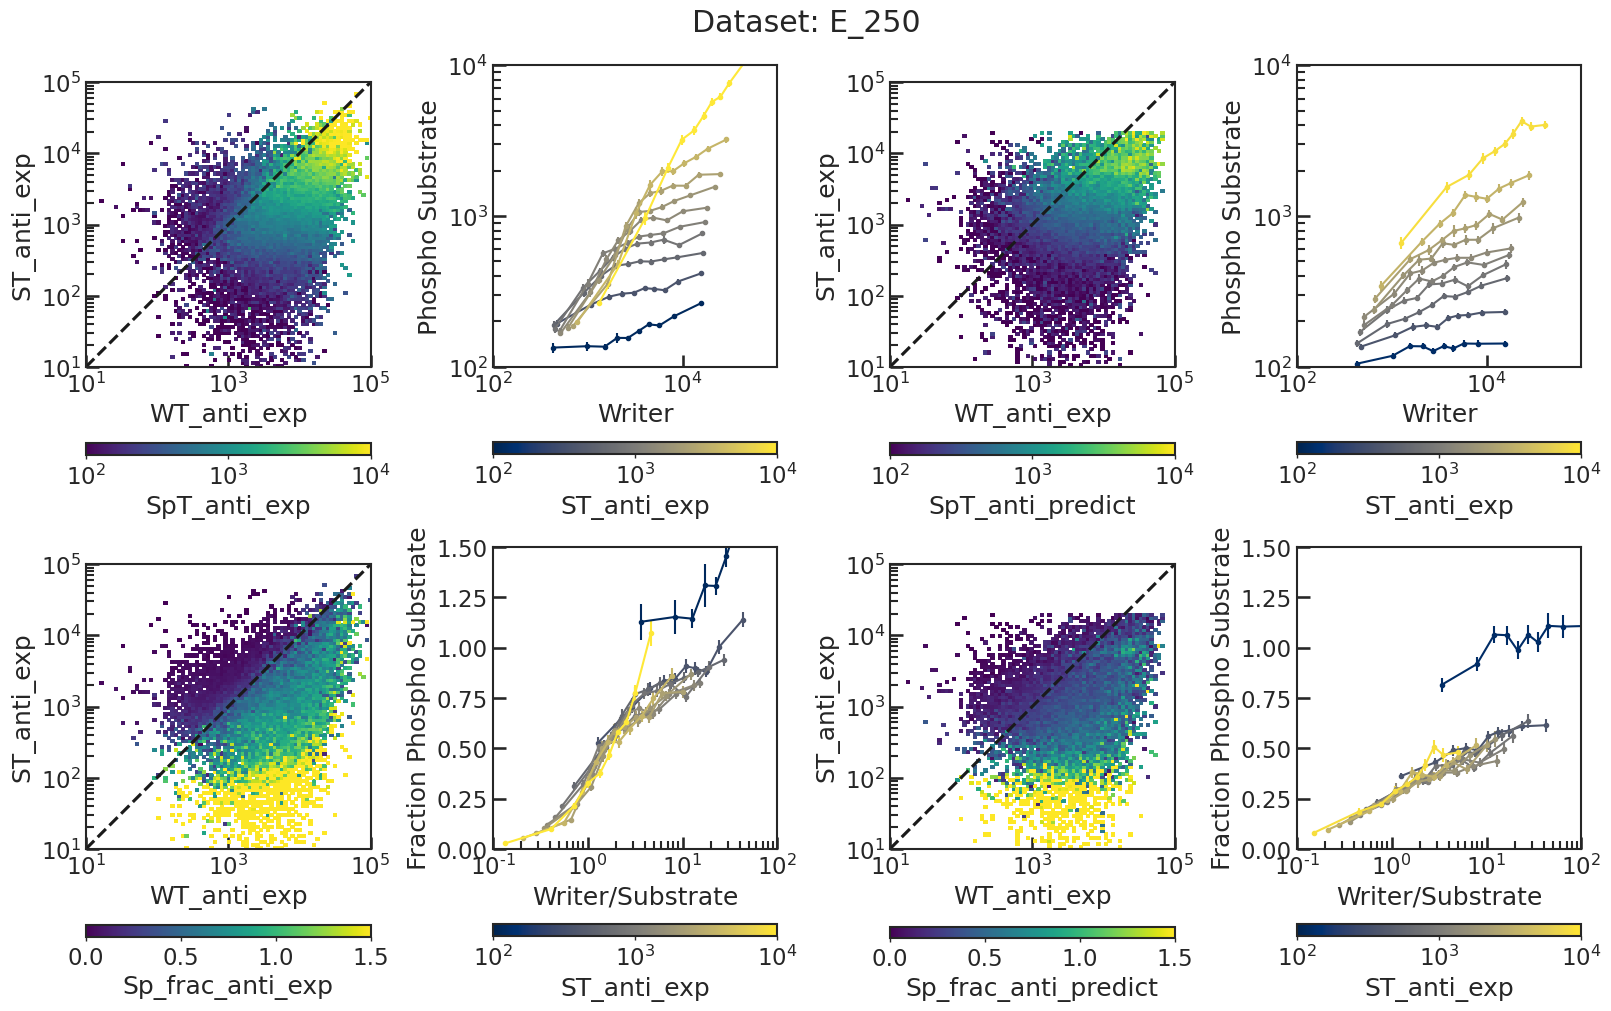

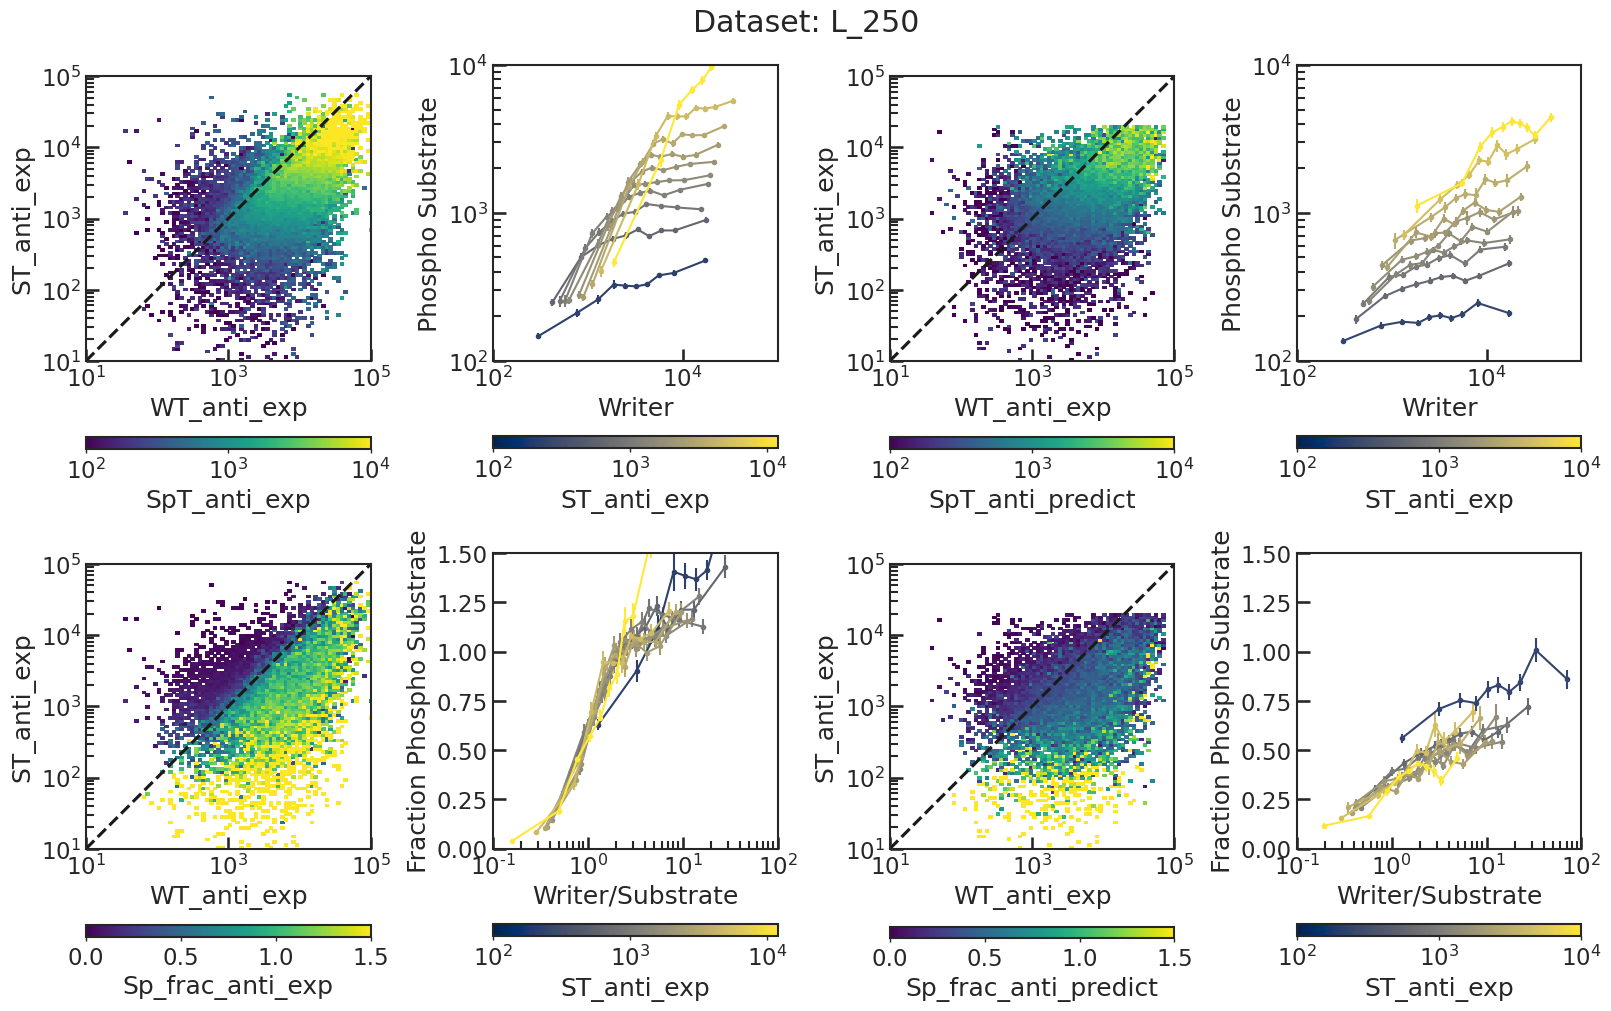

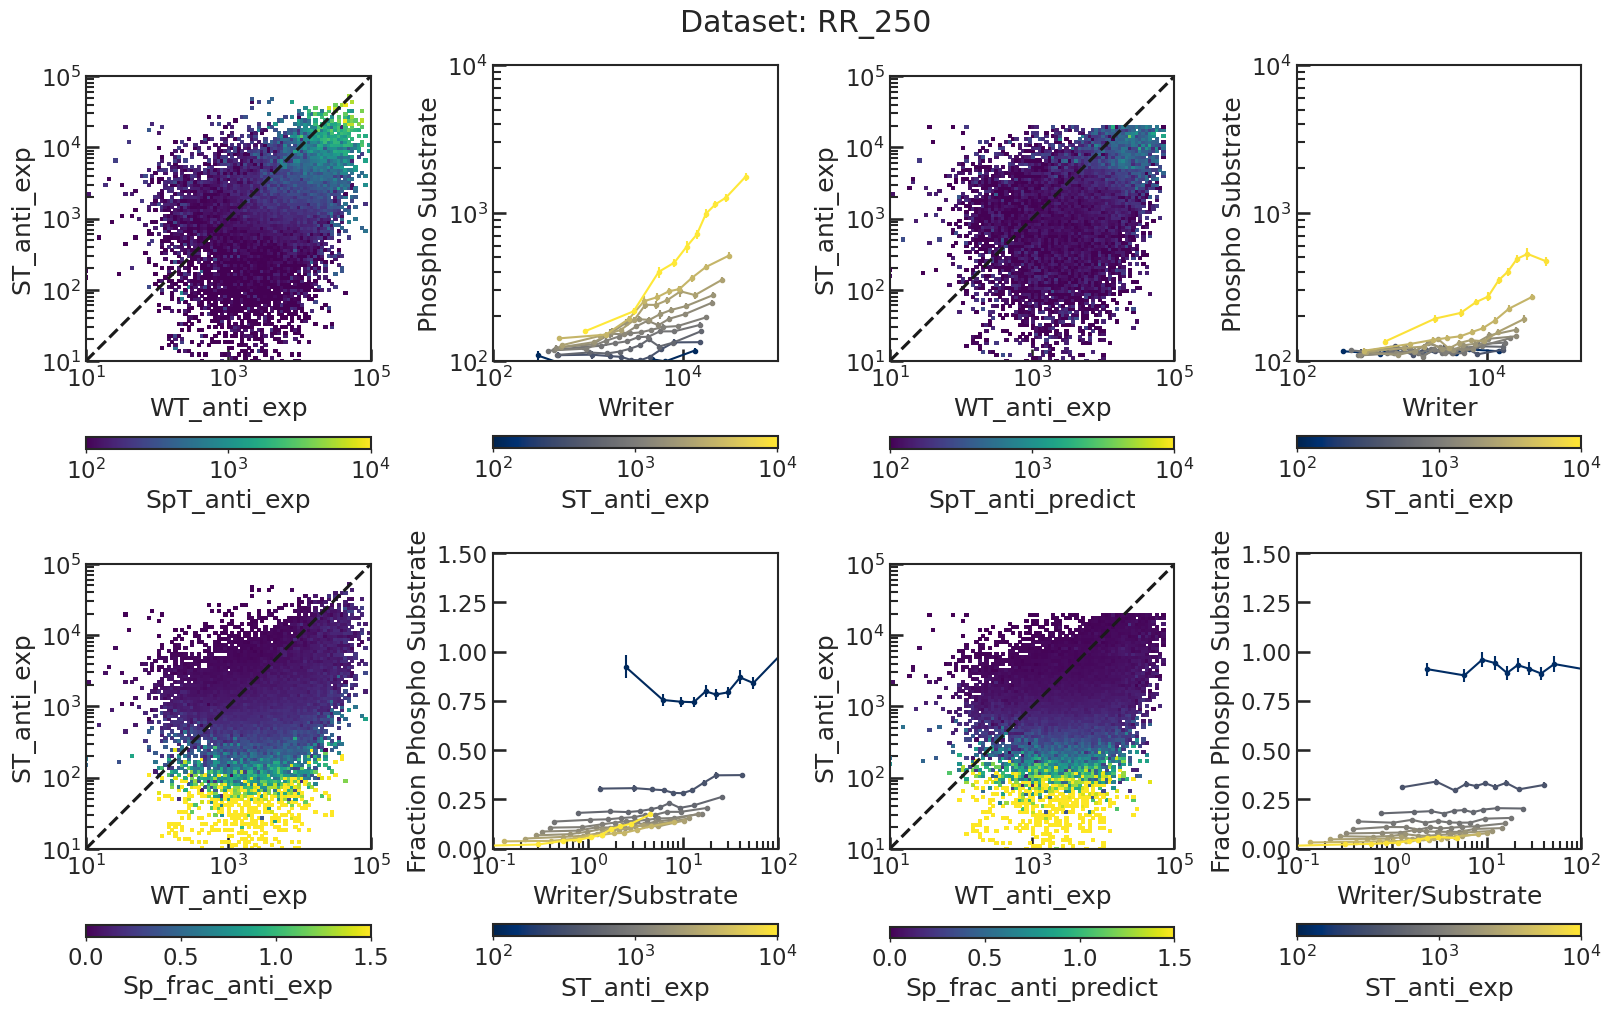

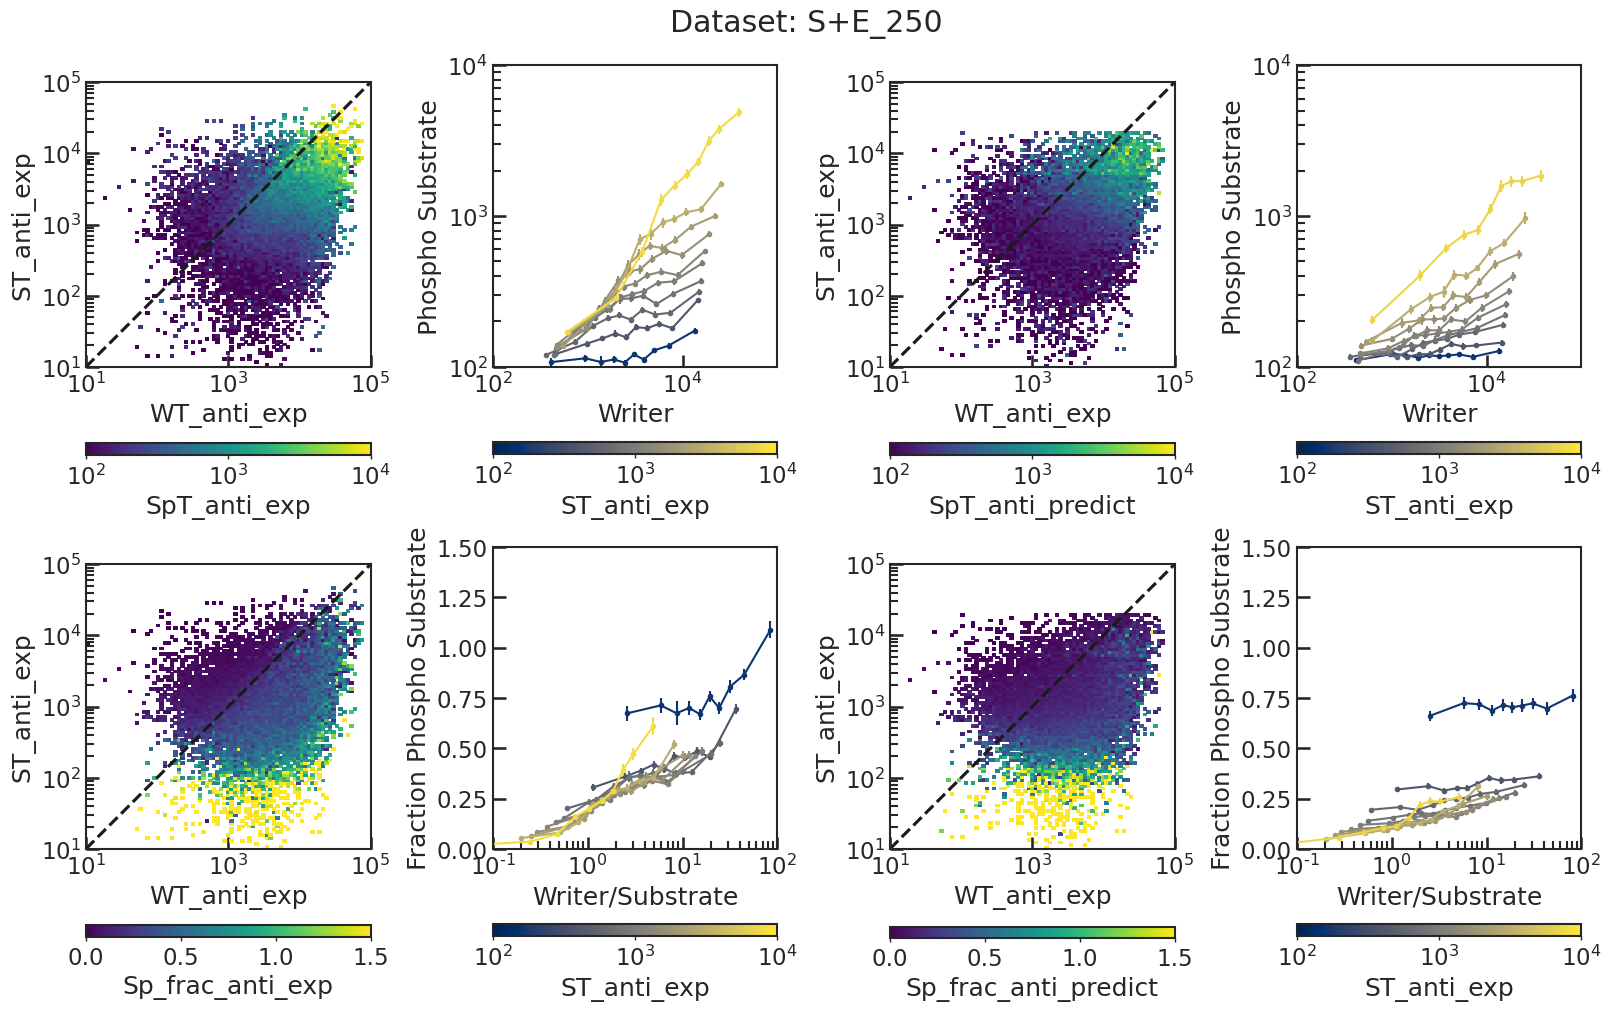

In [17]:
for dataset, group in df.groupby("dataset"):


    fig = plt.figure(constrained_layout=True, figsize=(16, 10))
    
    gs = fig.add_gridspec(2, 4)

    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 0])
    
    fplot.plot_2d_avg(group, fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', logscale=True, vmin=1e2, vmax=1e4)
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 1])
    
    fplot.plot_activation_curves(group, fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', normalizex=False, normalizey=False)
    
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 2])
    
    fplot.plot_2d_avg(group.dropna().copy(), fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_predict', logscale=True, vmin=1e2, vmax=1e4)
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 3])
    
    fplot.plot_activation_curves(group.dropna().copy(), fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_predict', normalizex=False, normalizey=False)

    
    ##########################################################
    
    
    ax = fig.add_subplot(gs[1, 0])
    
    fplot.plot_2d_avg(group, fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'Sp_frac_anti_exp', logscale=False, vmin=0.0, vmax=1.5)
    
    
    ############################################################
    
    
    ax = fig.add_subplot(gs[1, 1])
    
    fplot.plot_activation_curves(group, fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_exp', normalizex=True, normalizey=True, xlim=(1e-1, 1e2), ylim=(0, 1.5))
    
    
    ############################################################
    
    ax = fig.add_subplot(gs[1, 2])
    
    fplot.plot_2d_avg(group.dropna().copy(), fig, ax, 'WT_anti_exp', 'ST_anti_exp', 'Sp_frac_anti_predict', logscale=False, vmin=0.0, vmax=1.5)
    
    
    ############################################################
    
    ax = fig.add_subplot(gs[1, 3])
    
    fplot.plot_activation_curves(group.dropna().copy(), fig, ax, 
                                 'WT_anti_exp', 'ST_anti_exp', 'SpT_anti_predict', normalizex=True, normalizey=True, xlim=(1e-1, 1e2), ylim=(0, 1.5))
    
    ##########################################################

#     fig.suptitle("Dataset: {0}, Inverse Zipper Strength: {1:.2f}, Phospho Rate: {2:.2f}".format(dataset, row['kinase_bind_affin'], row['kinase_phospho_rate']))

    fig.suptitle("Dataset: {0}".format(dataset))

    plt.show()
    

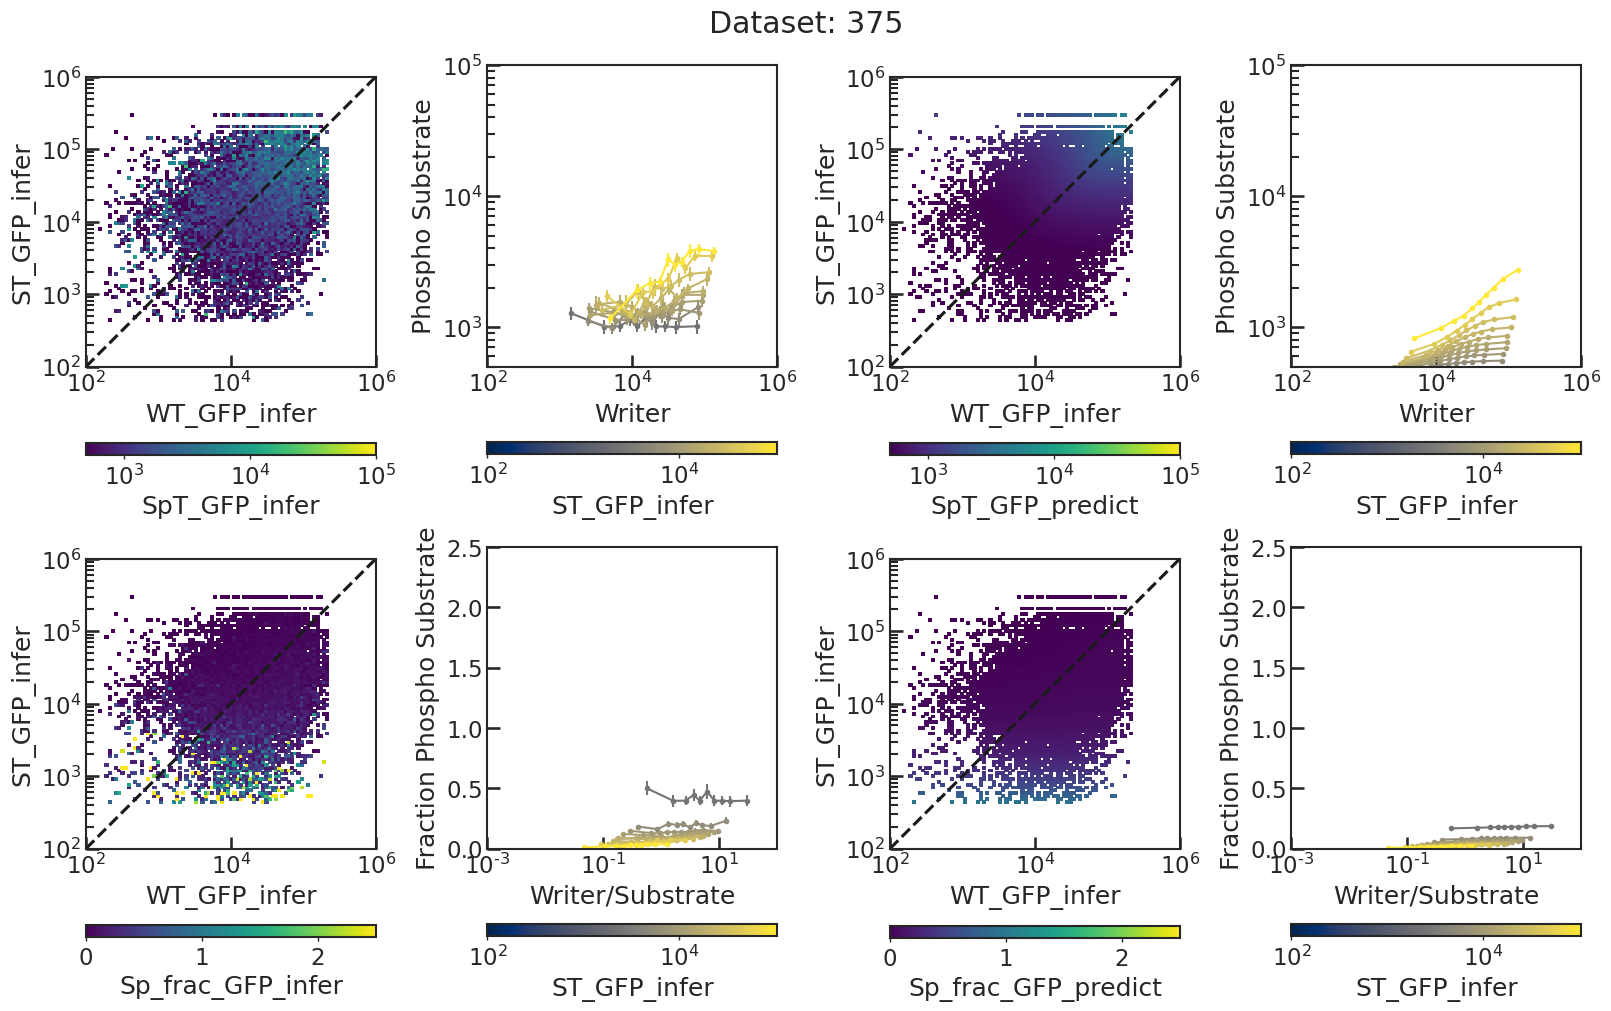

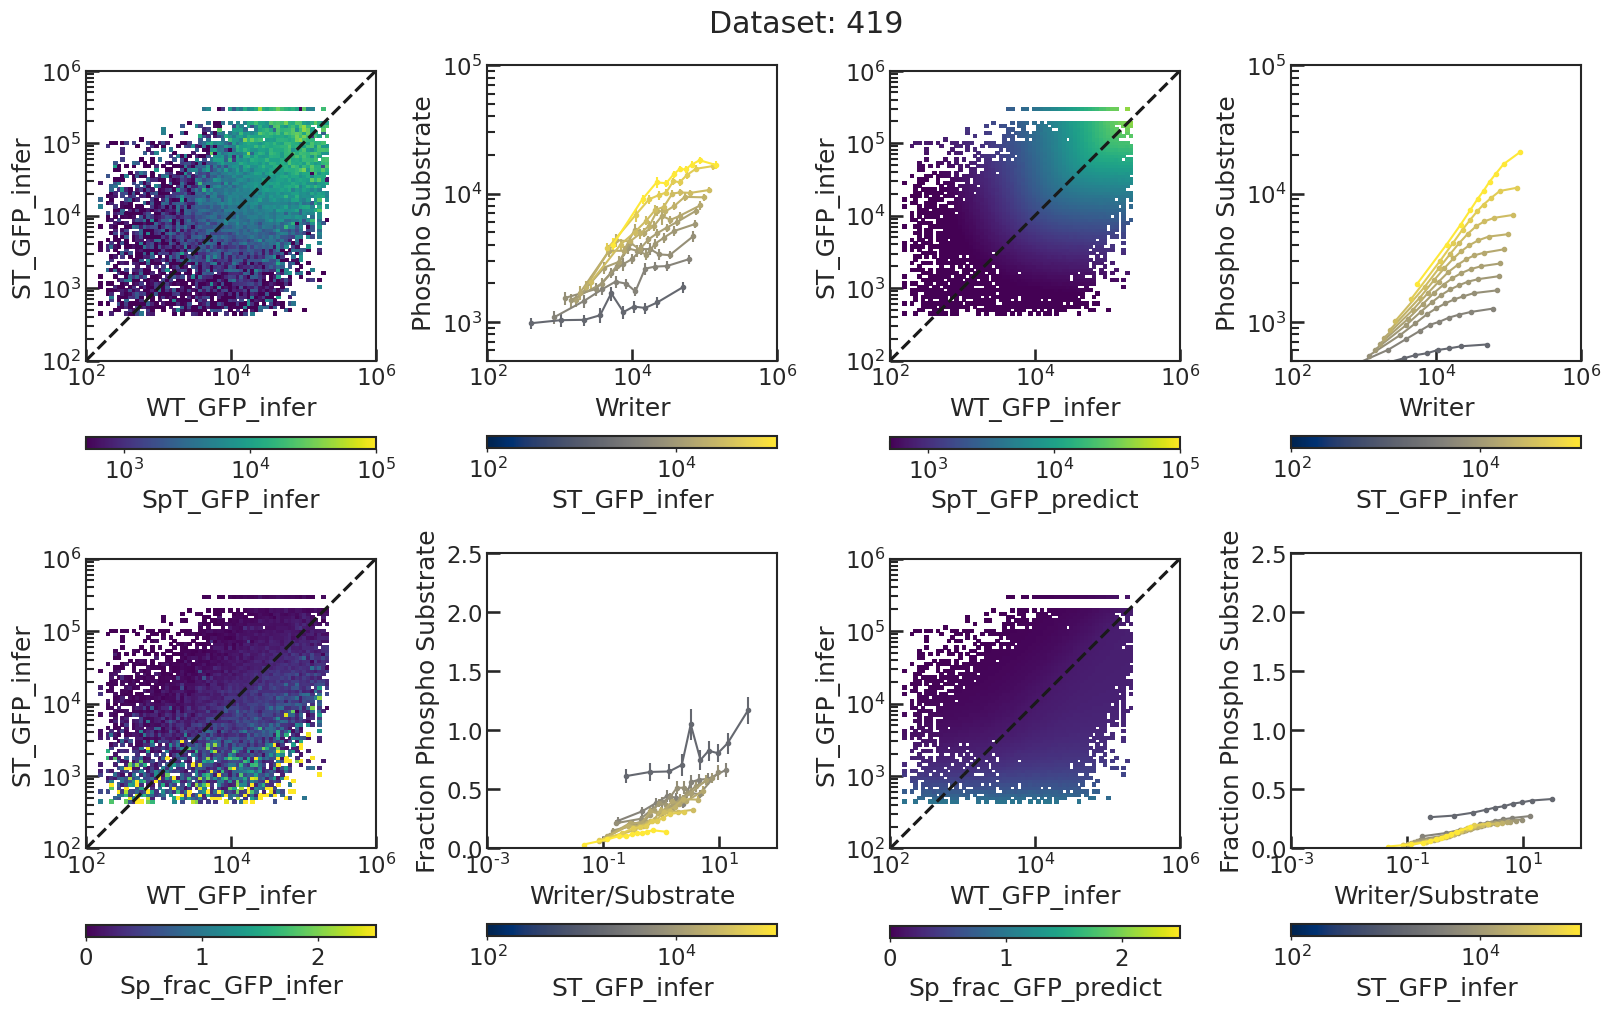

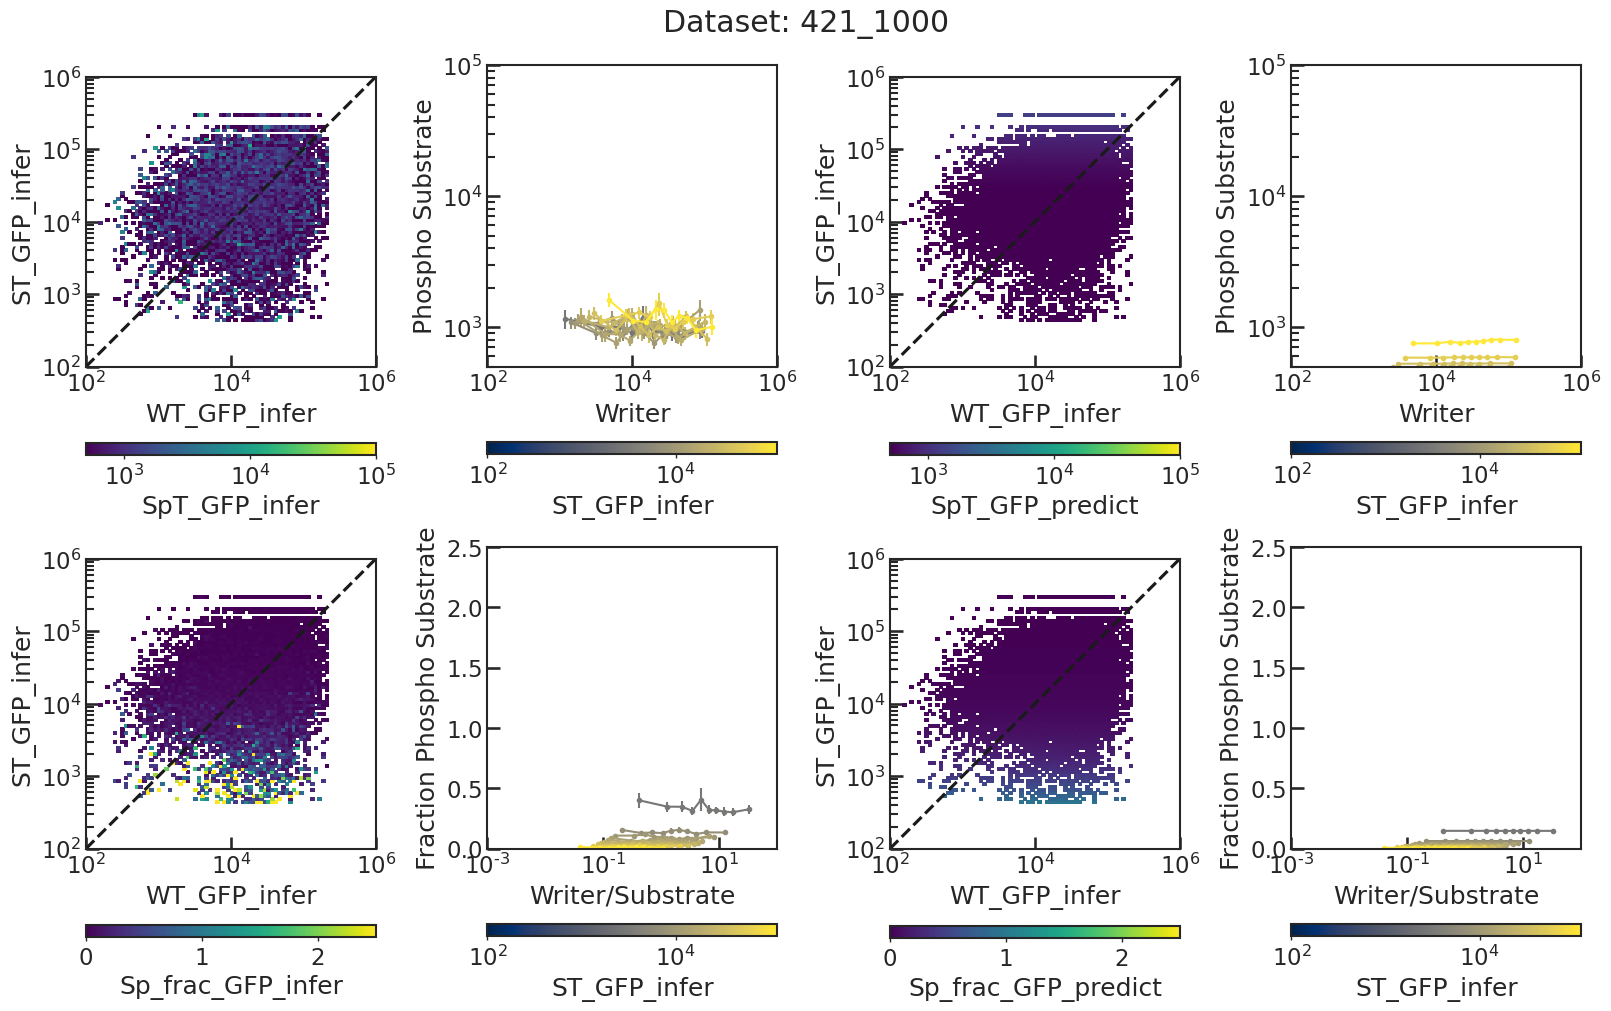

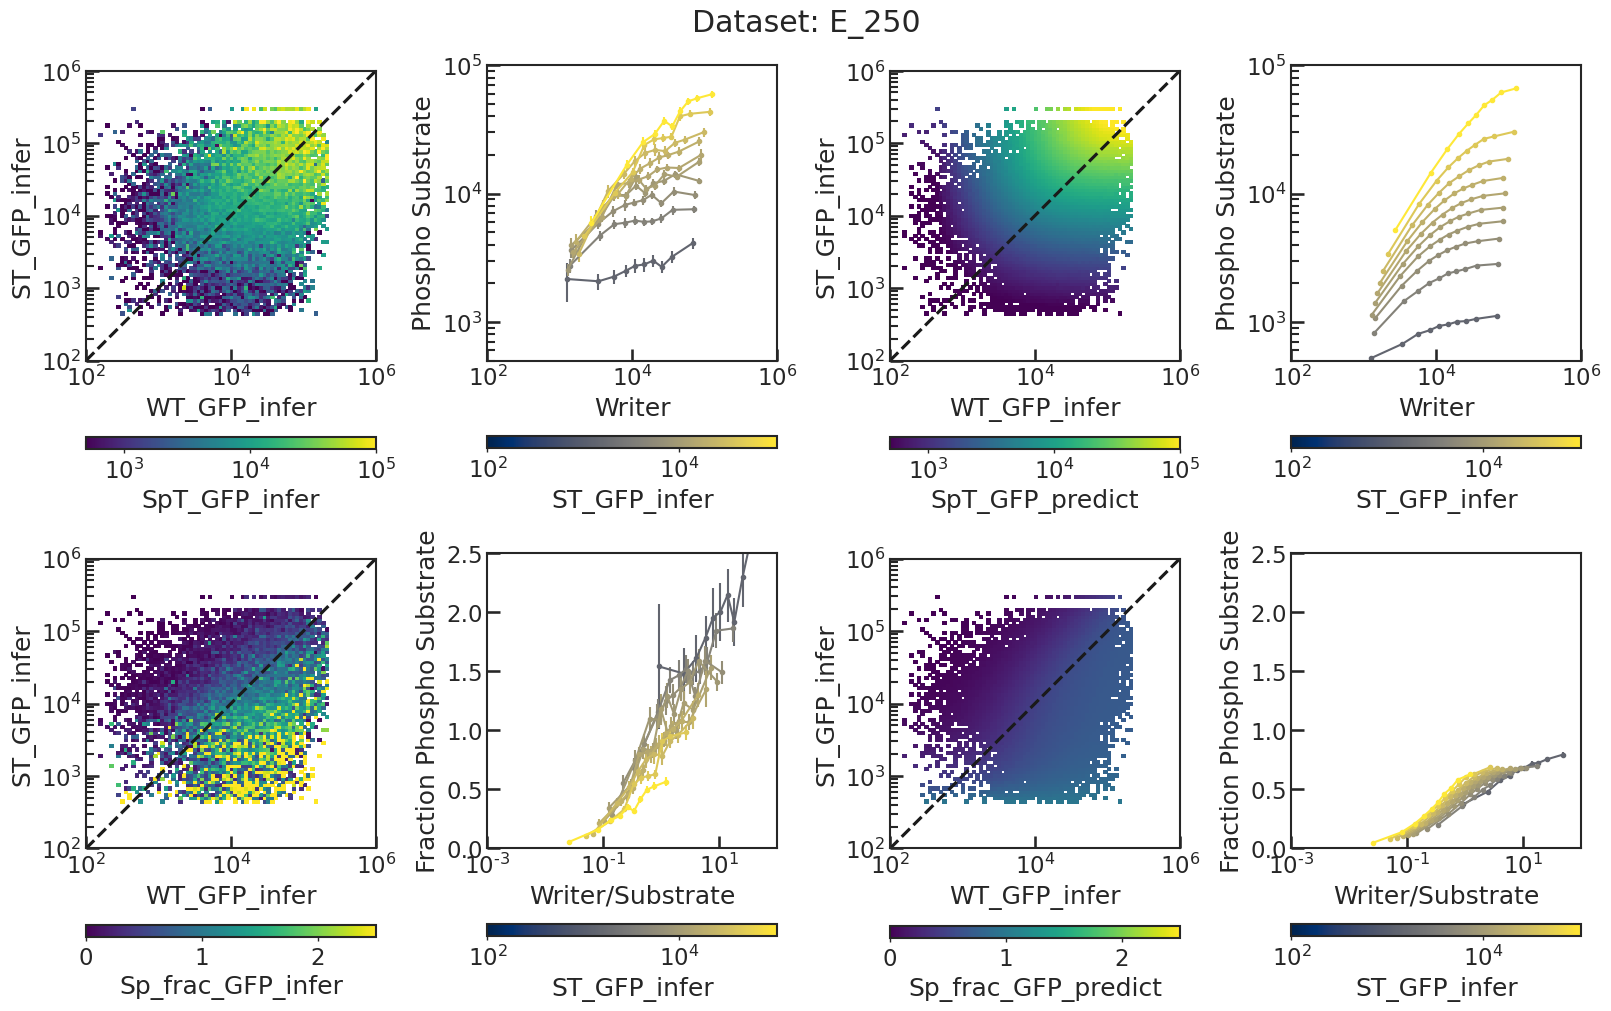

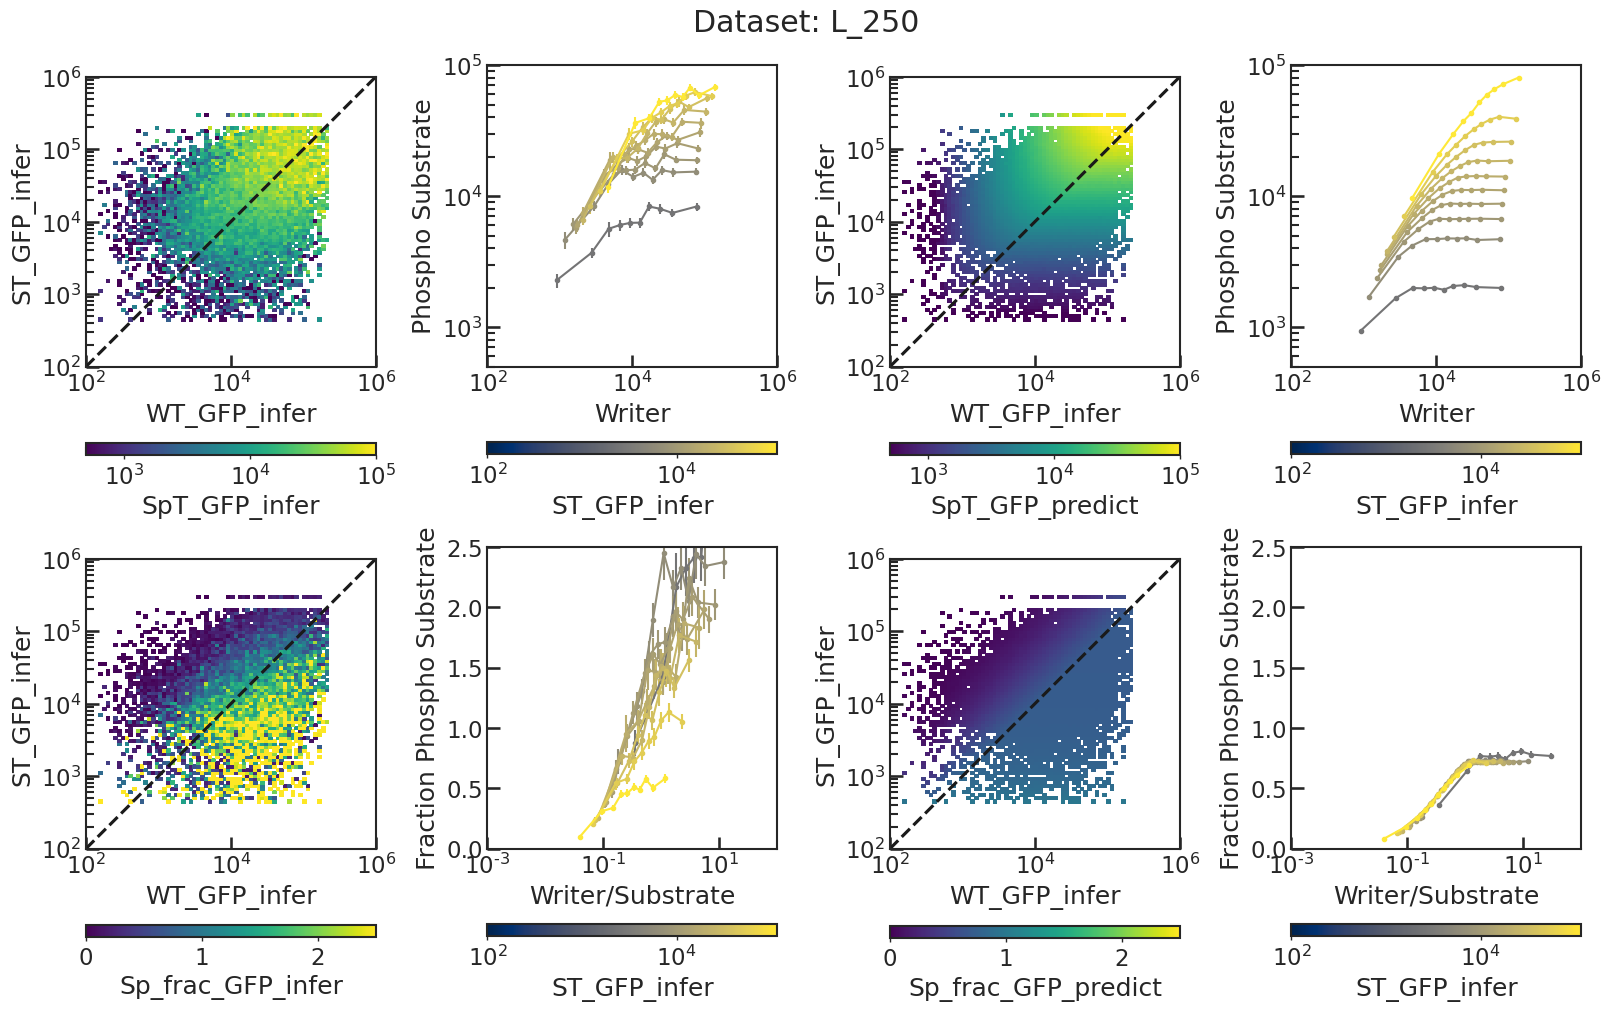

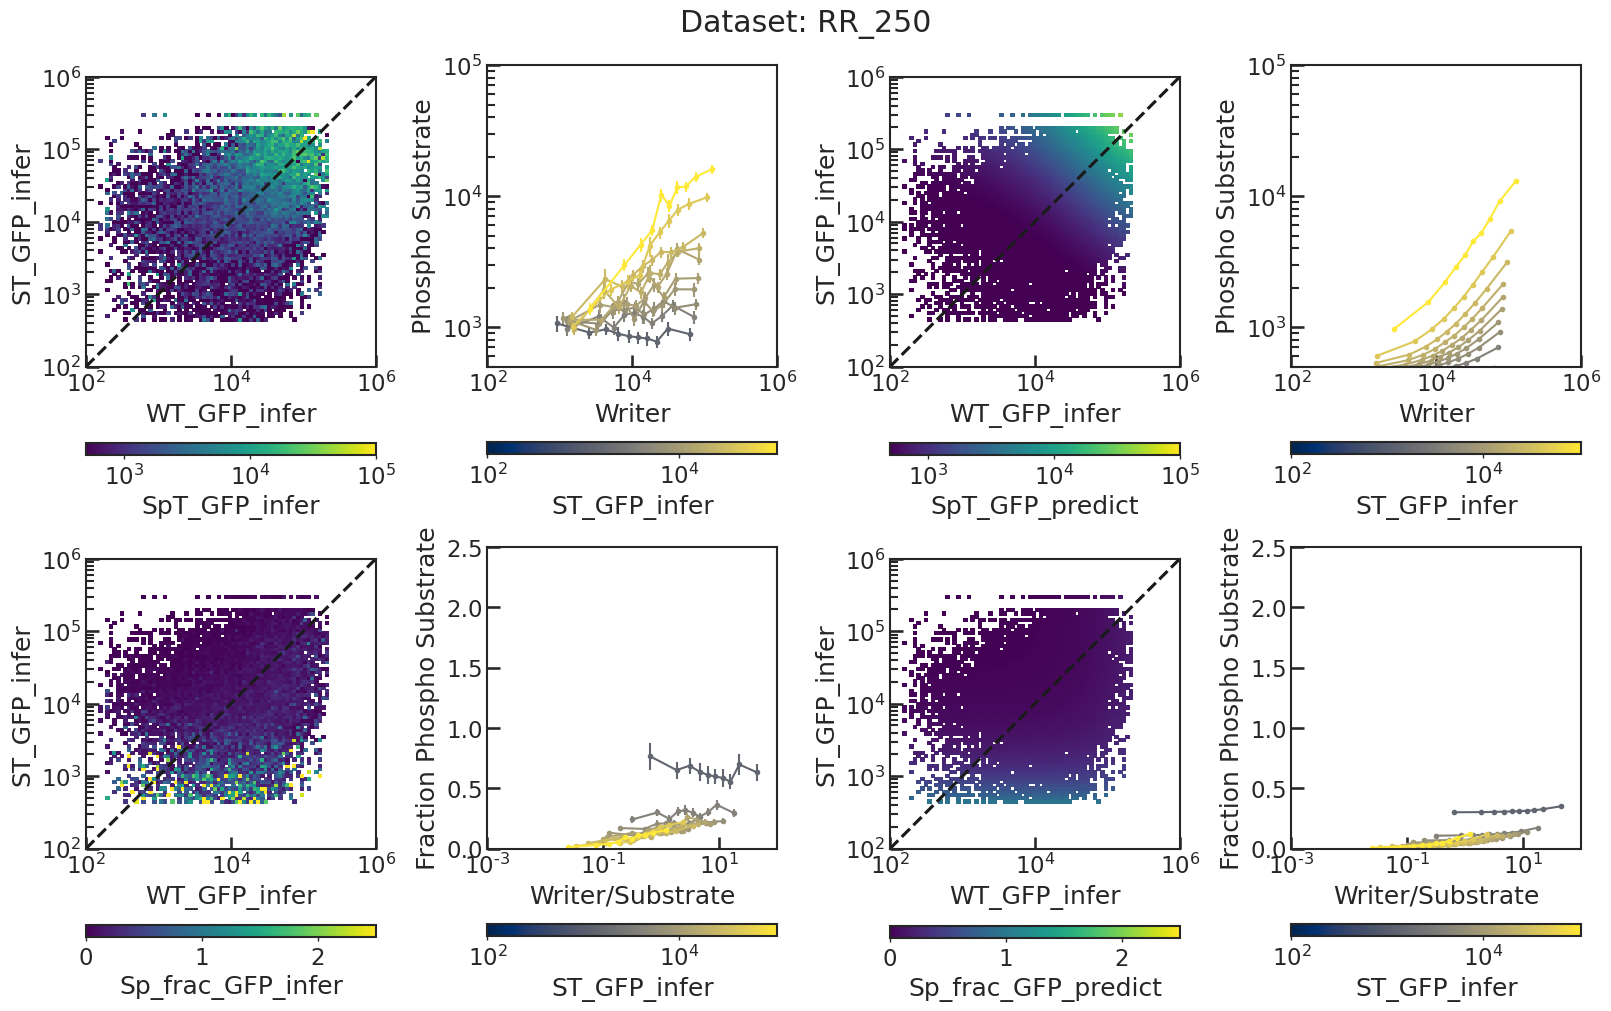

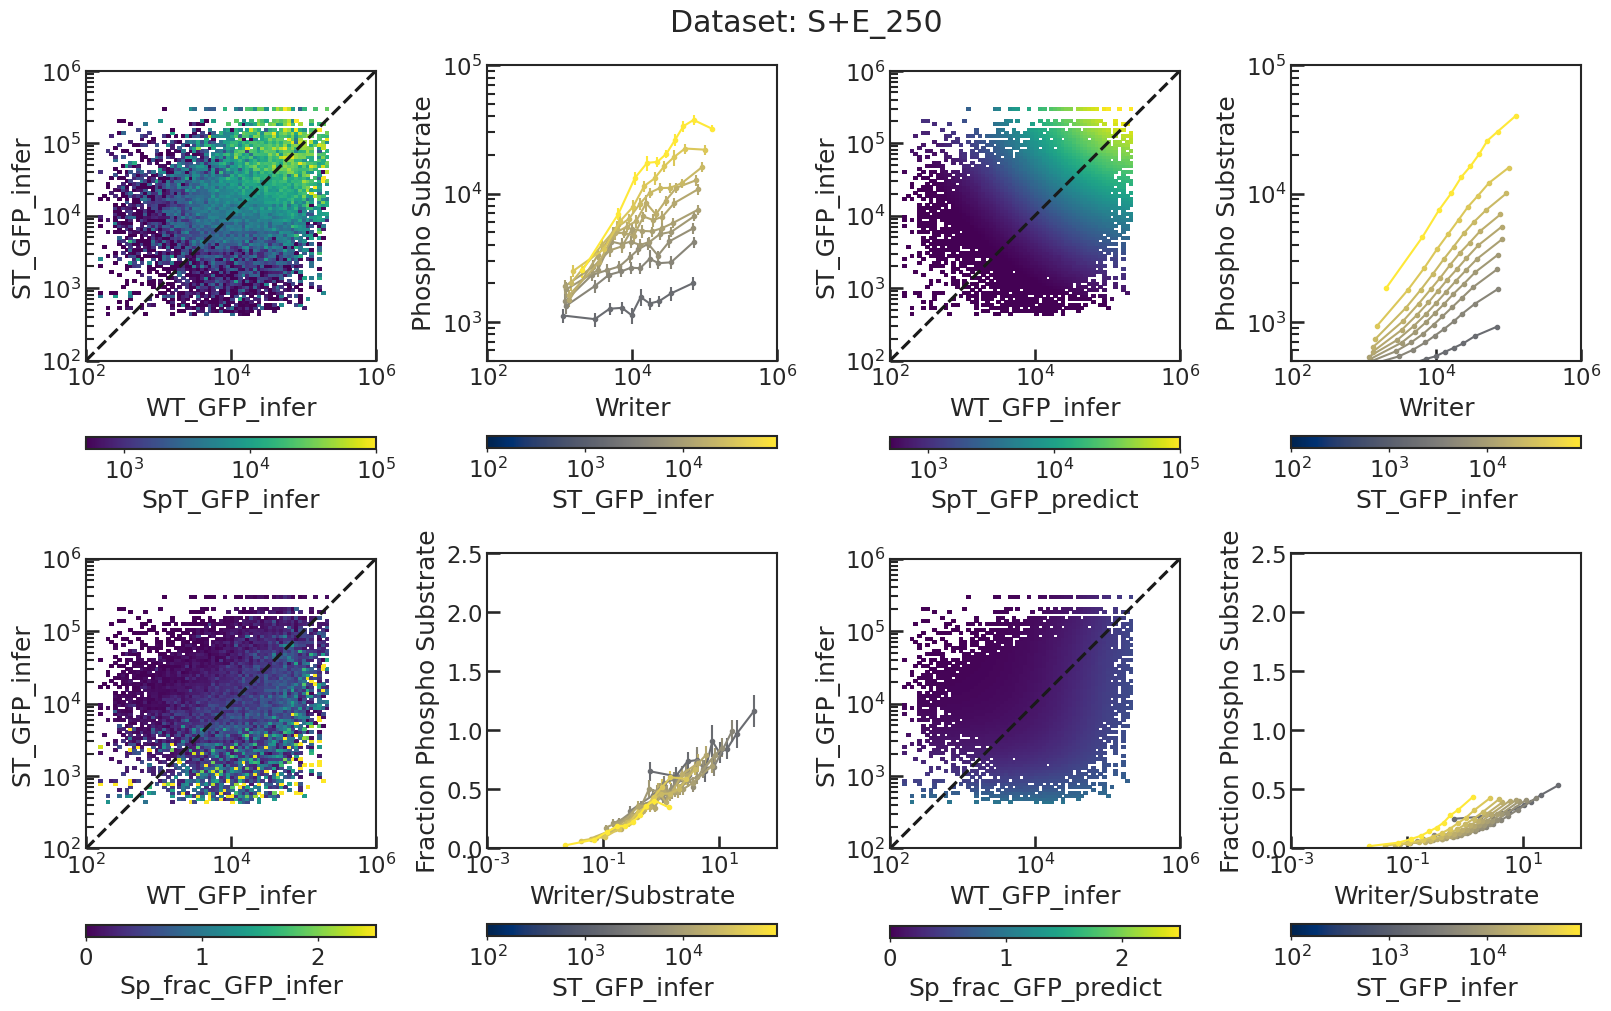

In [18]:
for dataset, group in df.groupby("dataset"):
    
    df_tmp = group.dropna().copy()

    fig = plt.figure(constrained_layout=True, figsize=(16, 10))
    
    gs = fig.add_gridspec(2, 4)

    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 0])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_infer', logscale=True, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0.5e3, vmax=1e5)
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 1])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_infer', normalizex=False, normalizey=False, xlim=(1e2, 1e6), ylim=(0.5e3, 1e5))
    
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 2])
    
    fplot.plot_2d_avg(df_tmp.copy(), fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_predict', logscale=True, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0.5e3, vmax=1e5)
    
    
    ##########################################################
    
    ax = fig.add_subplot(gs[0, 3])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_predict', normalizex=False, normalizey=False, xlim=(1e2, 1e6), ylim=(0.5e3, 1e5))

    
    ##########################################################
    
    
    ax = fig.add_subplot(gs[1, 0])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'Sp_frac_GFP_infer', logscale=False, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0, vmax=2.5)
    
    
    ############################################################
    
    
    ax = fig.add_subplot(gs[1, 1])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_infer', normalizex=True, normalizey=True, xlim=(1e-3, 1e2), ylim=(0.0, 2.5))
    
        
    ############################################################
    
    ax = fig.add_subplot(gs[1, 2])
    
    fplot.plot_2d_avg(df_tmp, fig, ax, 'WT_GFP_infer', 'ST_GFP_infer', 'Sp_frac_GFP_predict', logscale=False, xlim=(1e2, 1e6), ylim=(1e2, 1e6), vmin=0, vmax=2.5)
    
#     ax.vlines(row['kinase_bind_affin']+np.median(empty_writer_noise.get_GFP()), ymin=1e2, ymax=1e6, ls='--', color='k')

    
    ############################################################
    
    ax = fig.add_subplot(gs[1, 3])
    
    fplot.plot_activation_curves(df_tmp, fig, ax, 
                                 'WT_GFP_infer', 'ST_GFP_infer', 'SpT_GFP_predict', normalizex=True, normalizey=True, xlim=(1e-3, 1e2), ylim=(0.0, 2.5))
    
    ##########################################################

#     fig.suptitle("Dataset: {0}, Inverse Zipper Strength: {1:.2f}, Phospho Rate: {2:.2f}".format(dataset, row['kinase_bind_affin'], row['kinase_phospho_rate']))
    fig.suptitle("Dataset: {0}".format(dataset))

    plt.show()
                
        


Num Cells: 17924 Points per bin: 10 Num Bins: 42
Num Cells: 22377 Points per bin: 10 Num Bins: 47


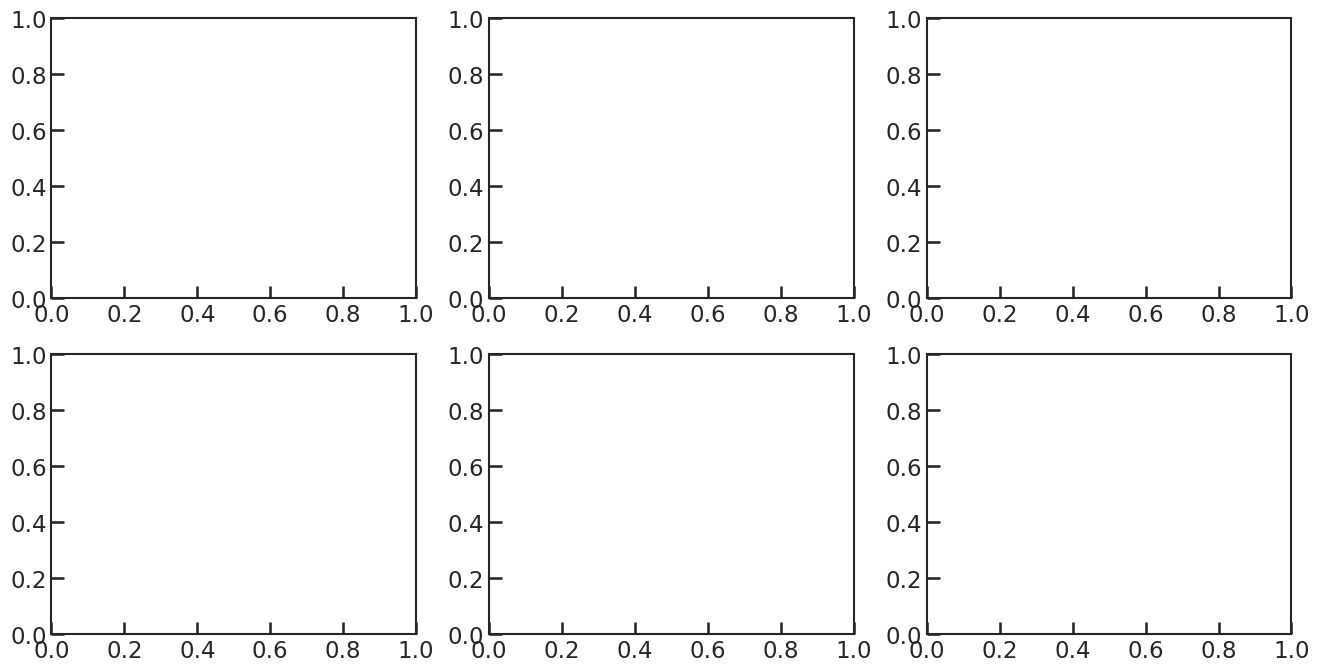

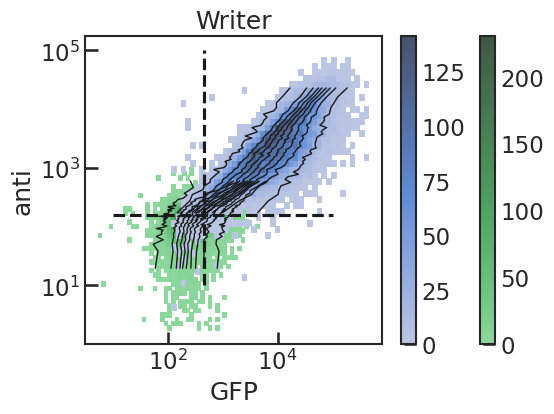

Num Cells: 10802 Points per bin: 10 Num Bins: 32
Num Cells: 22377 Points per bin: 10 Num Bins: 47


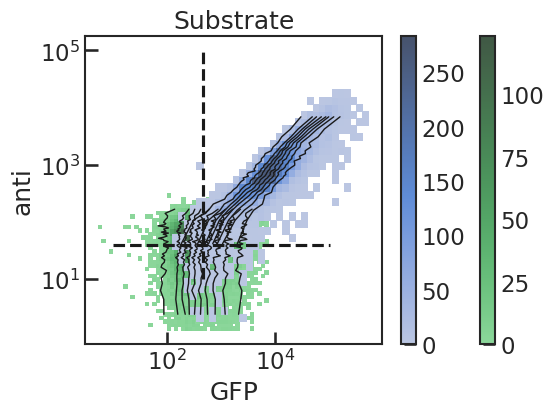

Num Cells: 10802 Points per bin: 10 Num Bins: 32
Num Cells: 22377 Points per bin: 10 Num Bins: 47


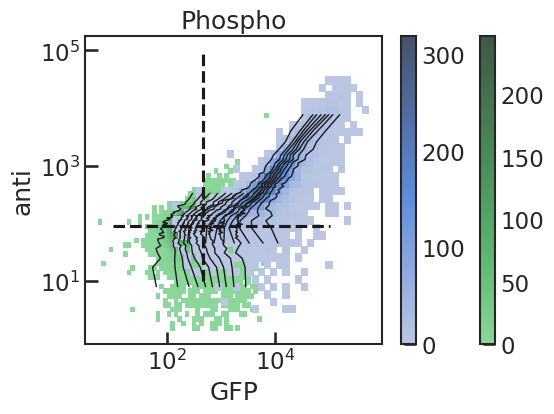

Num Cells: 10802 Points per bin: 10 Num Bins: 32
Num Cells: 33179 Points per bin: 10 Num Bins: 57


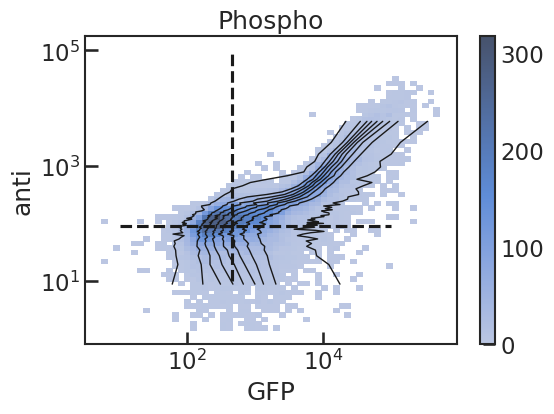

Num Cells: 10802 Points per bin: 10 Num Bins: 32
Num Cells: 22377 Points per bin: 10 Num Bins: 47


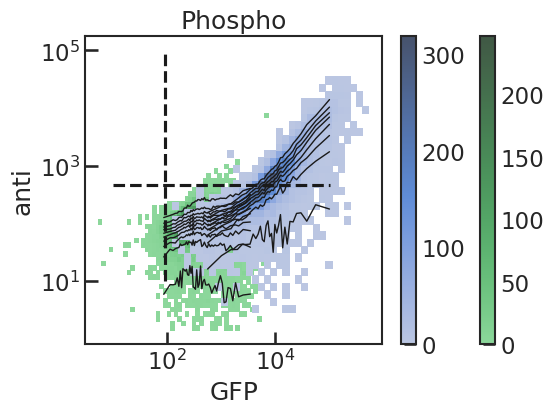

Num Cells: 33179 Points per bin: 10 Num Bins: 57


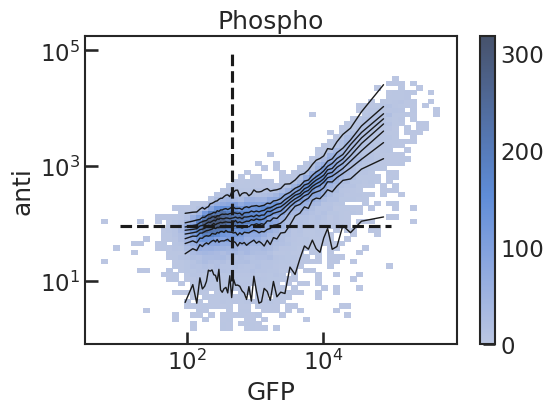

In [4]:
flag_label = 'Flag Antibody'
myc_label = 'Myc Antibody'

nbins_anti = 100
nbins_GFP = 100

writer_noise = noise.Anti2GFPNoise("../data/{}_noise/Flag noise.csv".format(label), 
                                   flag_label, 'GFP', ppbin=10, verbose=False)

empty_writer_noise = noise.Anti2GFPNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   flag_label, 'GFP', ppbin=10, verbose=False)


fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_writer_noise.plot(ax, color='g')
writer_noise.plot(ax)

ax.set_title("Writer")

ax.hlines(10**np.mean(np.log10(empty_writer_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_writer_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()

    
substrate_noise = noise.Anti2GFPNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   myc_label, 'GFP', ppbin=10, verbose=False)

empty_substrate_noise = noise.Anti2GFPNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   myc_label, 'GFP', ppbin=10, verbose=False)



fig, ax = plt.subplots(1, 1, figsize=(6, 4))
empty_substrate_noise.plot(ax, color='g')
substrate_noise.plot(ax)
ax.set_title("Substrate")

ax.hlines(10**np.mean(np.log10(empty_substrate_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(empty_substrate_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()


    
phospho_noise = noise.Anti2GFPNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   'Phospho', 'GFP', ppbin=10, verbose=False)

empty_phospho_noise = noise.Anti2GFPNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   'Phospho', 'GFP', ppbin=10, verbose=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

empty_phospho_noise.plot(ax, color='g')
phospho_noise.plot(ax)
ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()


combined_phospho_noise = noise.Anti2GFPNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   'Phospho', 'GFP', ppbin=10, verbose=False)
combined_phospho_noise.add_cells(empty_phospho_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
combined_phospho_noise.plot(ax)

ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()



inverse_phospho_noise = noise.GFP2AntiNoise("../data/{}_noise/Myc_Phospho noise.csv".format(label), 
                                   'GFP', 'Phospho', ppbin=10, verbose=False)

inverse_empty_phospho_noise = noise.GFP2AntiNoise("../data/{}_noise/Empty Cell.csv".format(label), 
                                   'GFP', 'Phospho', ppbin=10, verbose=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

inverse_empty_phospho_noise.plot(ax, color='g')
inverse_phospho_noise.plot(ax)
ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_GFP())), xmin=1e1, xmax=1e5, color='k', ls='--')
ax.vlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_anti())), ymin=1e1, ymax=1e5, color='k', ls='--')

plt.show()



inverse_phospho_noise.add_cells(inverse_empty_phospho_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
inverse_phospho_noise.plot(ax)

ax.set_title("Phospho")

ax.hlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_anti())), xmin=1e1, xmax=1e5, color='k', ls='--')

ax.vlines(10**np.mean(np.log10(inverse_empty_phospho_noise.get_GFP())), ymin=1e1, ymax=1e5, color='k', ls='--')


plt.show()



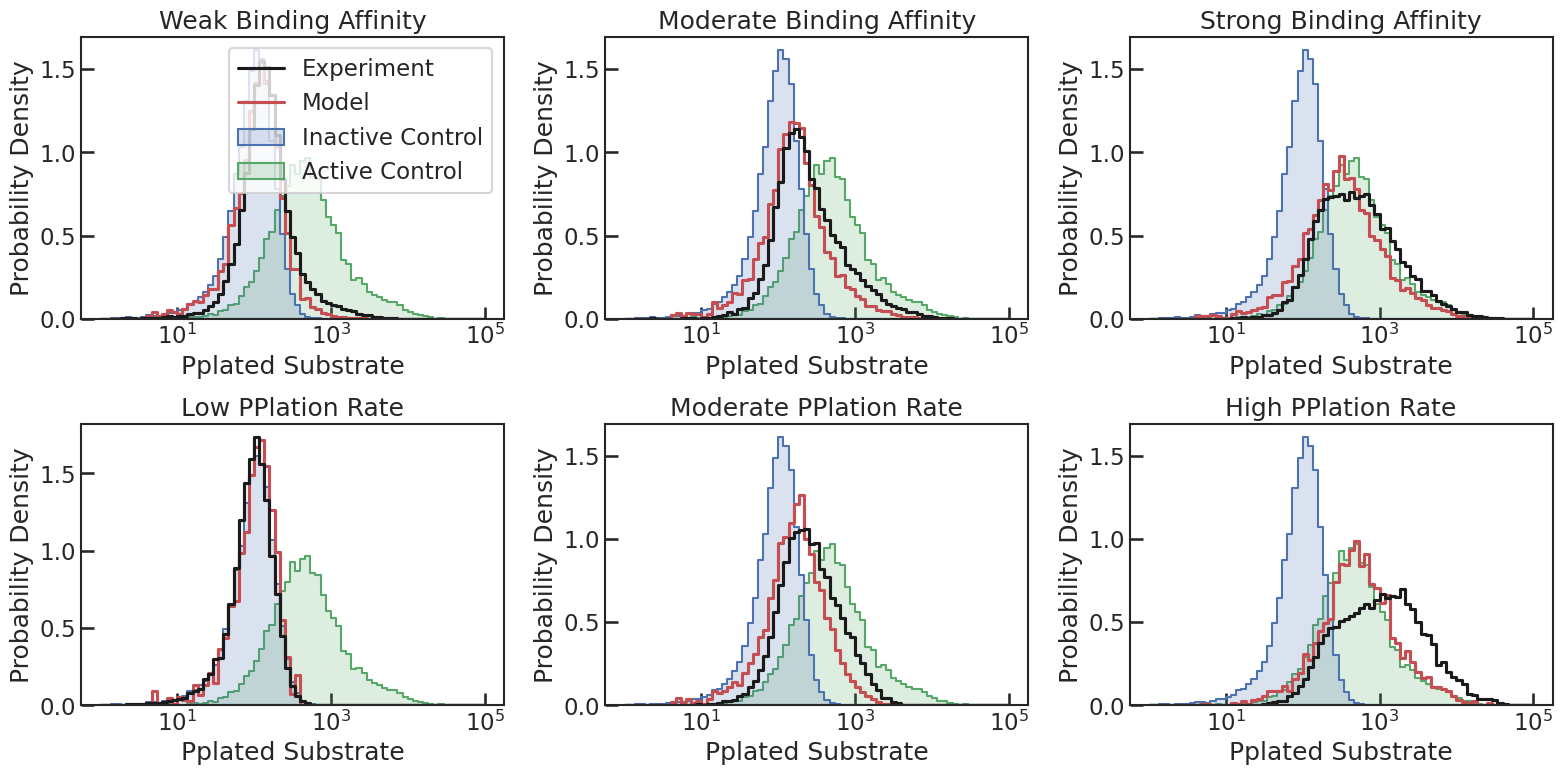

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))


binrange = (0, 5)
nbins = 75

alpha = 0.2


####################################################

ax = axes[0, 0]

dataset = 'RR_250'
    
df_tmp = df.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate")
ax.set_ylabel("Probability Density")
ax.set_title("Weak Binding Affinity")



####################################################


ax = axes[0, 1]

dataset = 'S+E_250'
    
df_tmp = df.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate")
ax.set_ylabel("Probability Density")
ax.set_title("Moderate Binding Affinity")



####################################################



ax = axes[0, 2]

dataset = 'E_250'
    
df_tmp = df.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate")
ax.set_ylabel("Probability Density")
ax.set_title("Strong Binding Affinity")



####################################################


ax = axes[1, 0]

dataset = '421_1000'
    
df_tmp = df.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate")
ax.set_ylabel("Probability Density")
ax.set_title("Low PPlation Rate")



####################################################


ax = axes[1, 1]

dataset = '419'
    
df_tmp = df.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate")
ax.set_ylabel("Probability Density")
ax.set_title("Moderate PPlation Rate")


####################################################


ax = axes[1, 2]

dataset = 'L_250'
    
df_tmp = df.query("dataset==@dataset").copy()  
    
sns.histplot(phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Active Control', color='g', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(empty_phospho_noise.get_anti(), binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Inactive Control', color='b', stat='density',
             element='step', fill=True, alpha=alpha)
sns.histplot(df_tmp['SpT_anti_predict'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Model', color='r', stat='density',
             element='step', fill=False)
sns.histplot(df_tmp['SpT_anti_exp'], binrange=binrange, log_scale=True, 
             bins=nbins, ax=ax, label='Experiment', color='k', stat='density',
             element='step', fill=False)


ax.set_aspect(4/6/ ax.get_data_ratio())

ax.set_xlabel("Pplated Substrate")
ax.set_ylabel("Probability Density")
ax.set_title("High PPlation Rate")


####################################################

handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0], handles[3], handles[2]]
labels = [labels[1], labels[0], labels[3], labels[2]]
axes[0,0].legend(handles, labels, loc='upper right')


plt.tight_layout()


plt.show()

